In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import LabelEncoder
from math import *

In [2]:
df = pd.read_csv('home-credit-default-risk//application_train.csv')

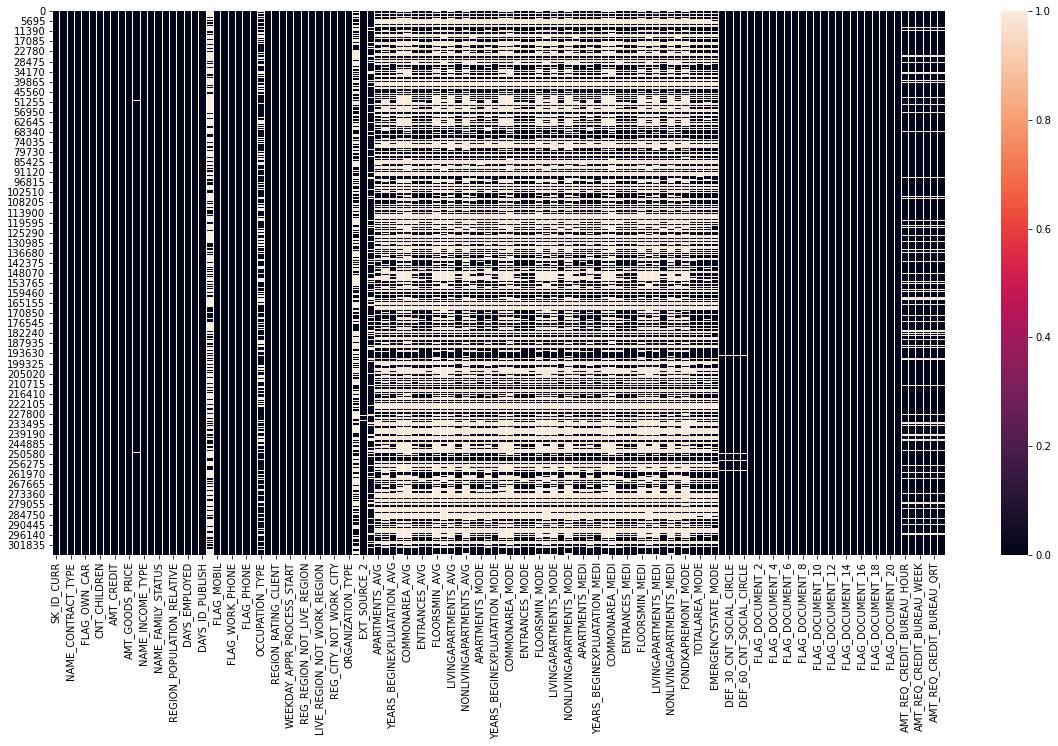

In [3]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [4]:
(df.isna().sum()/df.shape[0]).sort_values()

SK_ID_CURR                     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
                                 ...   
NONLIVINGAPARTMENTS_MEDI       0.694330
NONLIVINGAPARTMENTS_MODE       0.694330
COMMONAREA_MODE                0.698723
COMMONAREA_AVG                 0.698723
COMMONAREA_MEDI                0.698723
Length: 122, dtype: float64

In [5]:
#on suppr toutes les colonnes à plus de 90% de val manquante
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

# Variables du csv

In [6]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarni

<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-d7ff55bd56f5>:2: RuntimeWarni

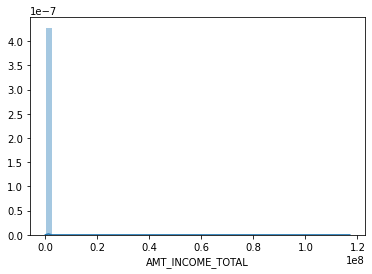

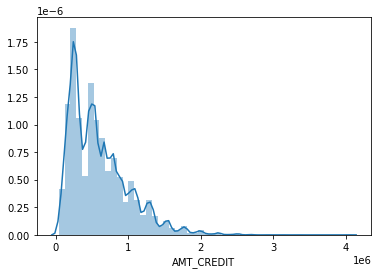

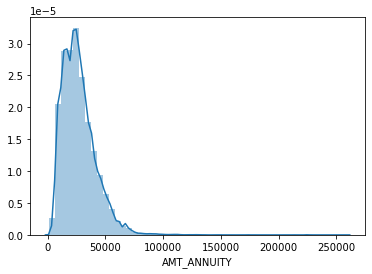

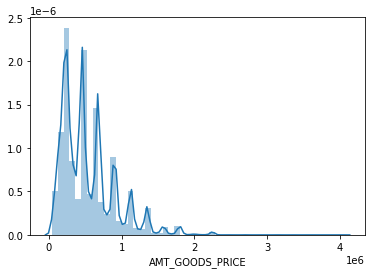

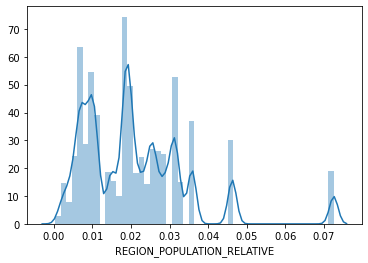

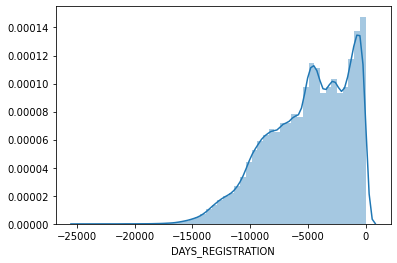

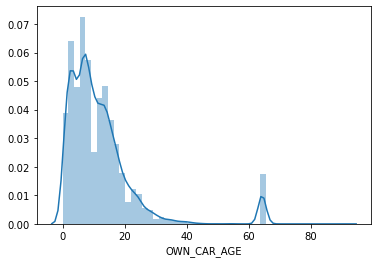

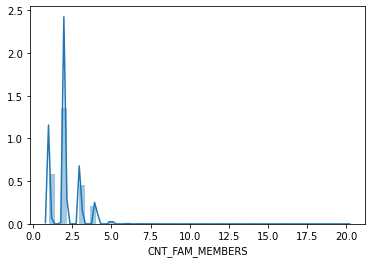

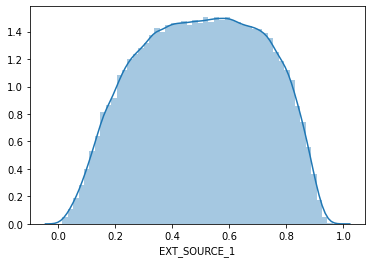

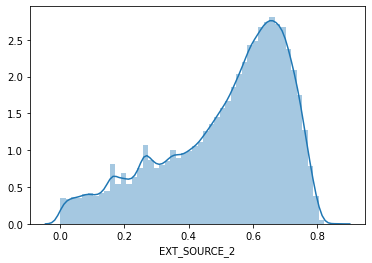

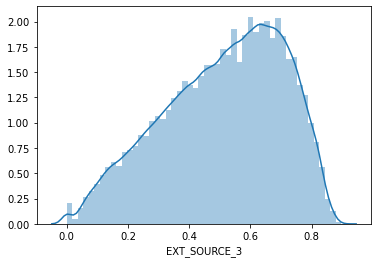

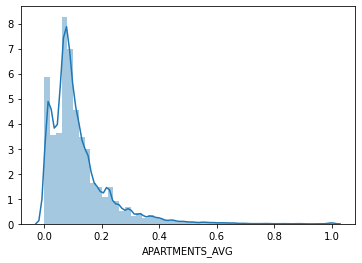

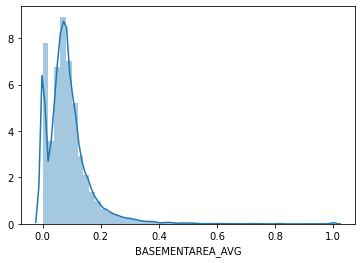

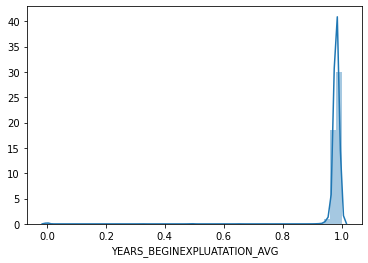

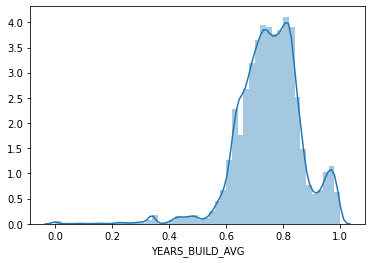

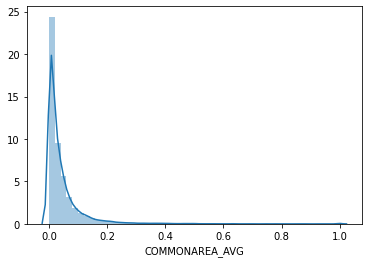

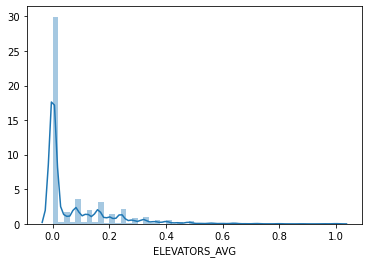

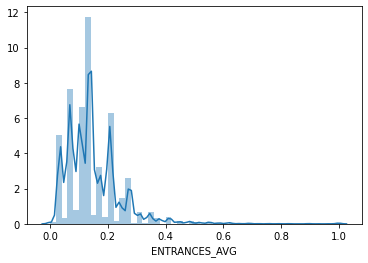

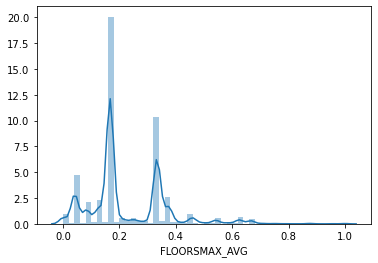

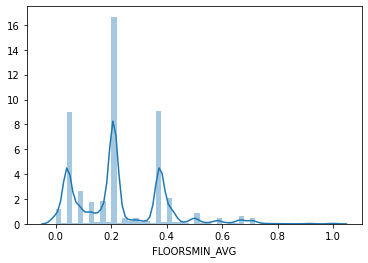

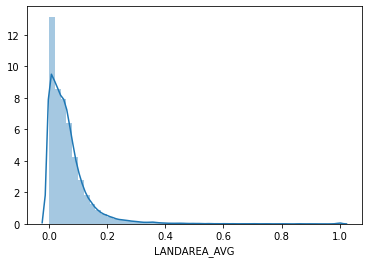

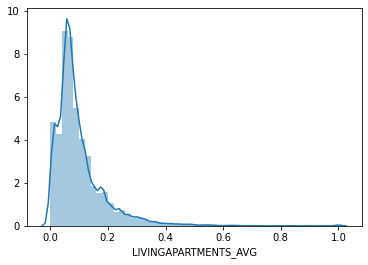

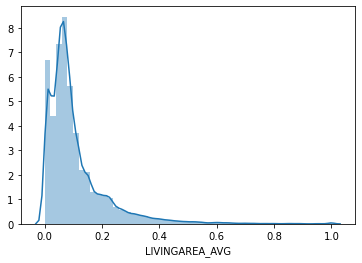

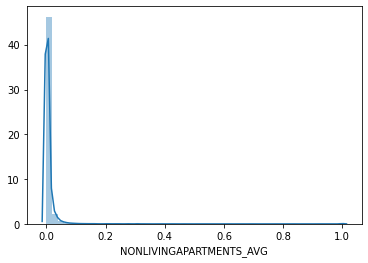

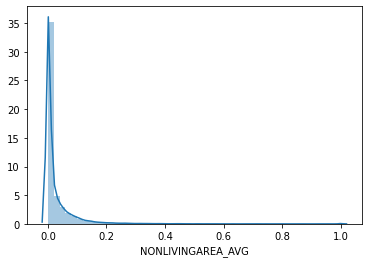

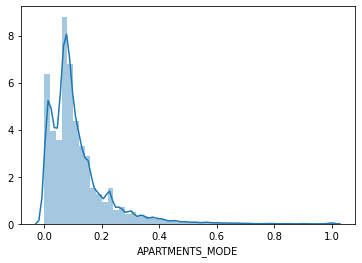

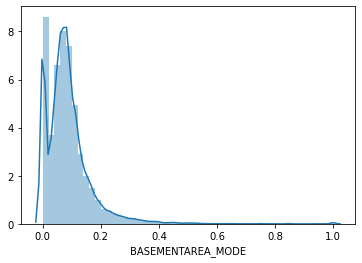

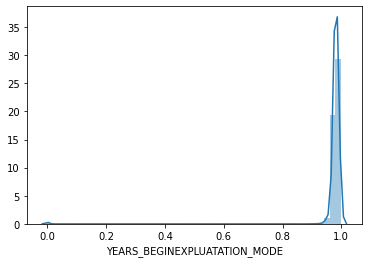

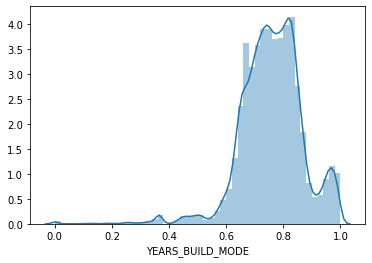

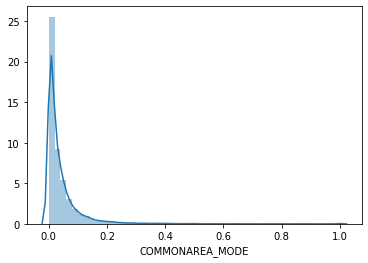

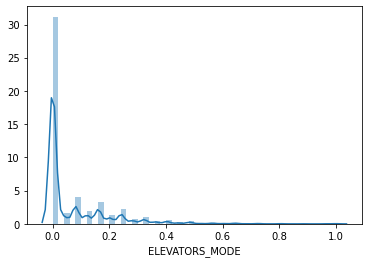

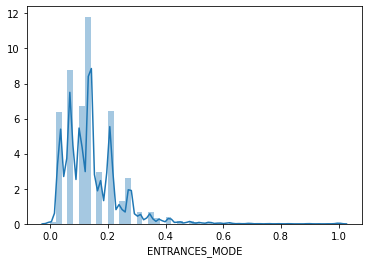

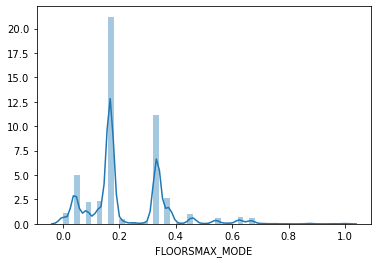

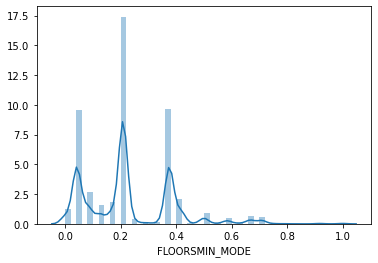

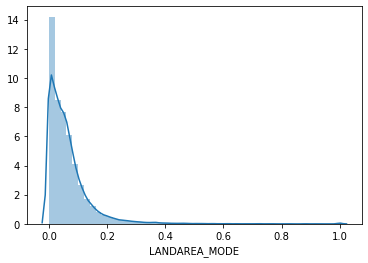

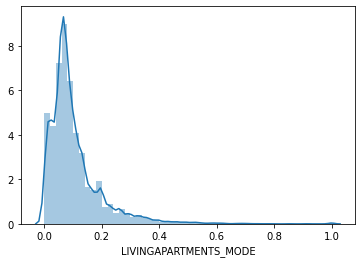

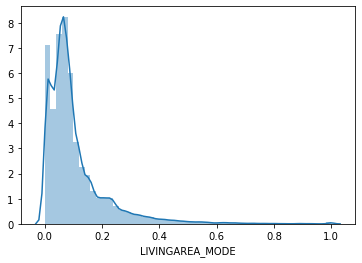

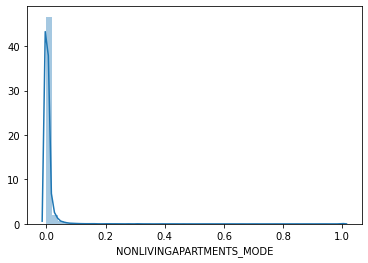

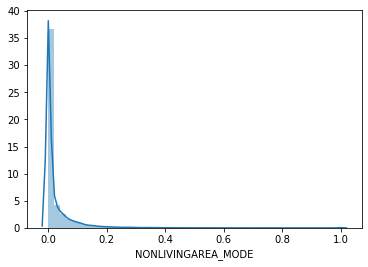

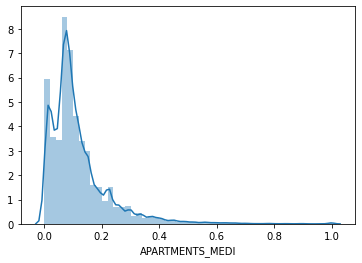

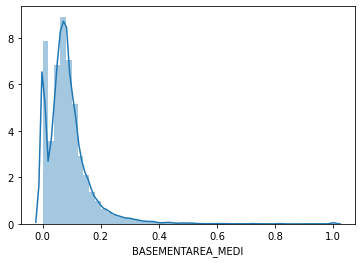

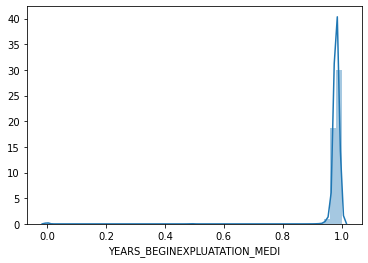

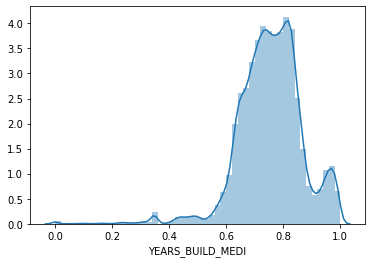

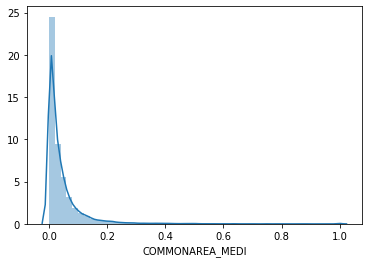

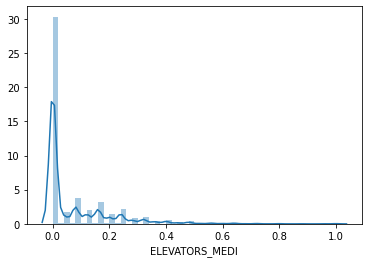

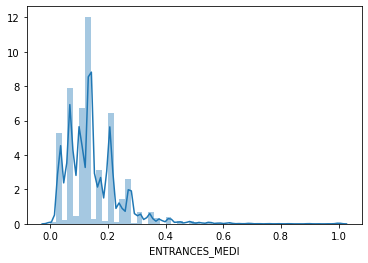

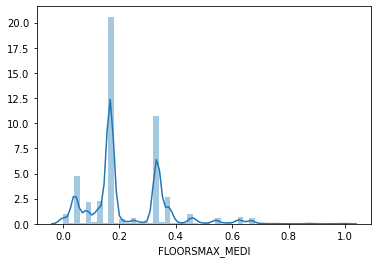

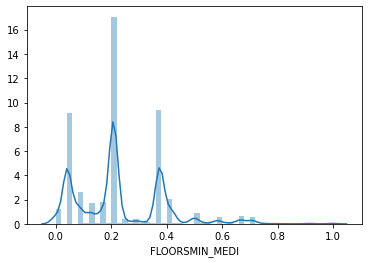

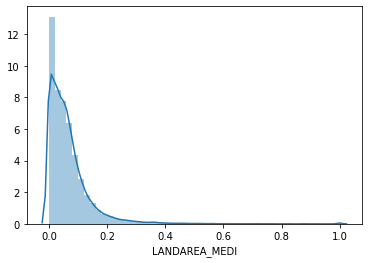

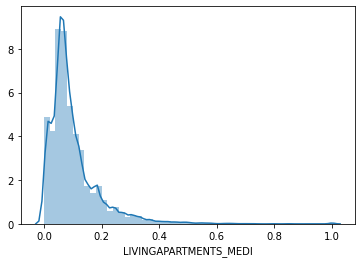

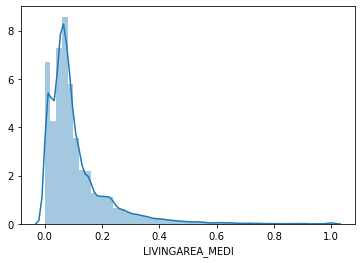

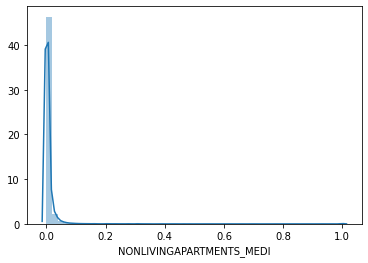

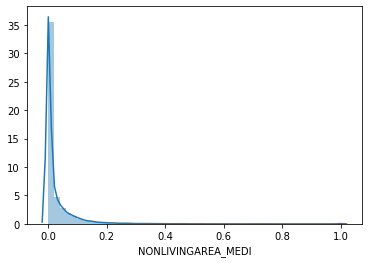

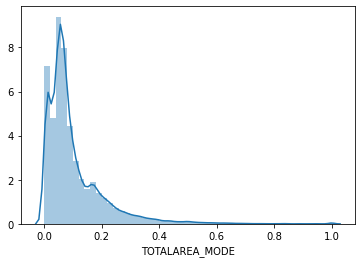

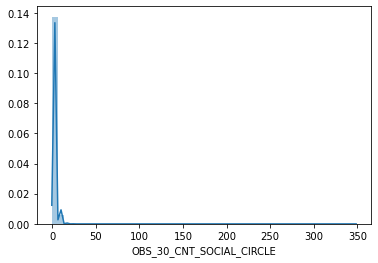

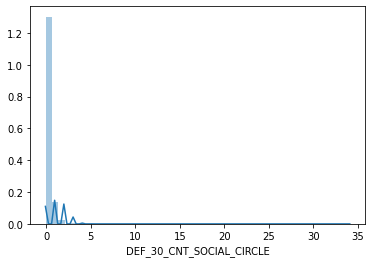

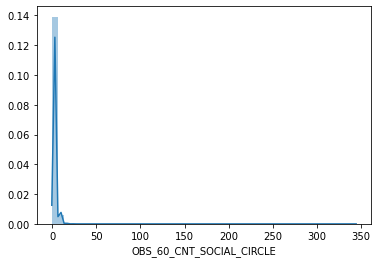

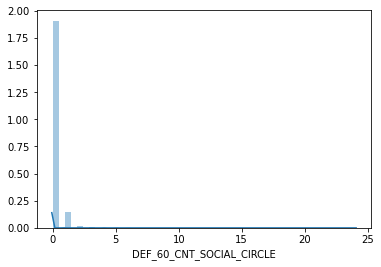

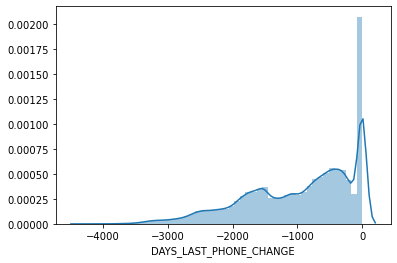

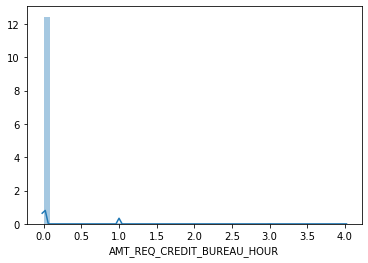

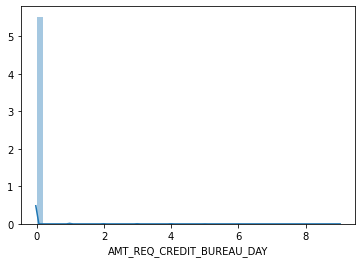

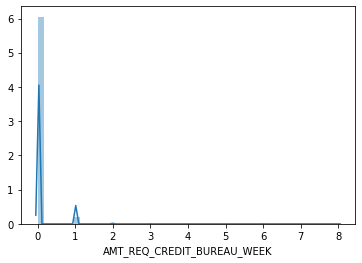

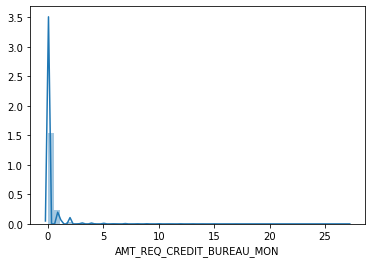

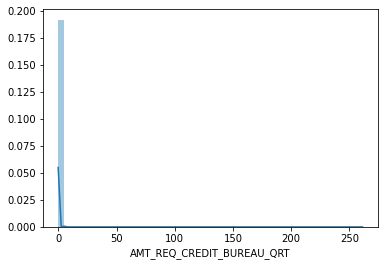

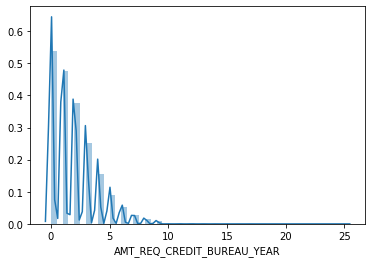

In [7]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

NAME_CONTRACT_TYPE---------------------- => ['Cash loans' 'Revolving loans']
CODE_GENDER----------------------------- => ['M' 'F' 'XNA']
FLAG_OWN_CAR---------------------------- => ['N' 'Y']
FLAG_OWN_REALTY------------------------- => ['Y' 'N']
NAME_TYPE_SUITE------------------------- => ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE------------------------ => ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE--------------------- => ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS---------------------- => ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE----------------------- => ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATI

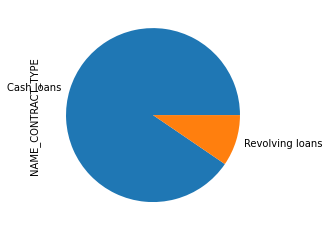

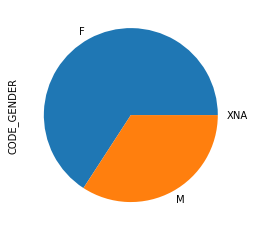

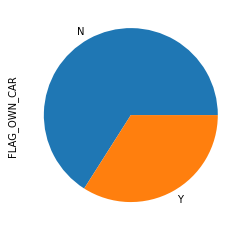

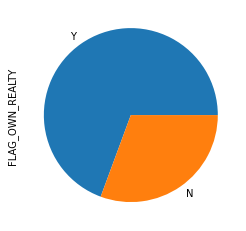

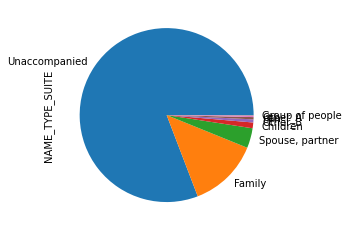

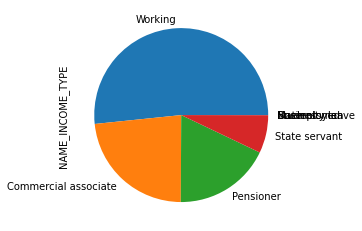

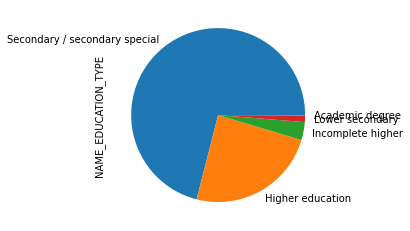

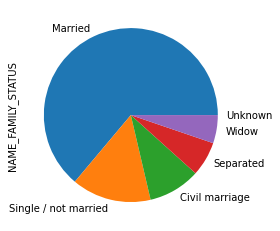

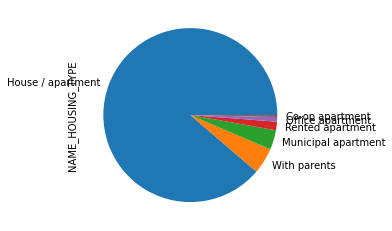

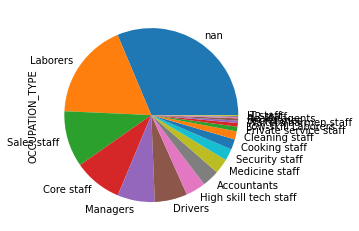

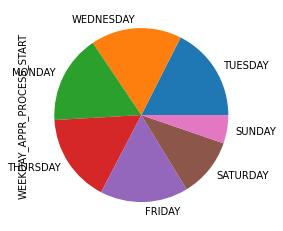

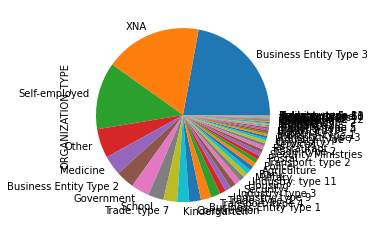

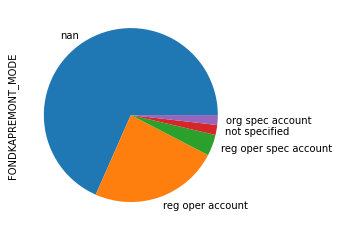

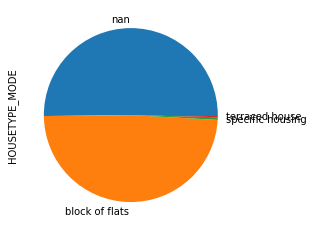

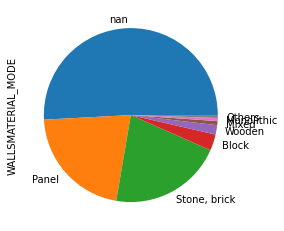

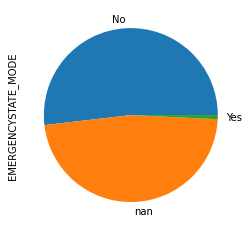

In [8]:
for col in df.select_dtypes('object'):
    print(f'{col :-<40} => {df[col].unique()}')
    plt.figure()
    df[col].value_counts(normalize=True, dropna=False).plot.pie()

In [9]:
df['EMERGENCYSTATE_MODE'].value_counts(normalize=True, dropna=False)

No     0.518446
NaN    0.473983
Yes    0.007570
Name: EMERGENCYSTATE_MODE, dtype: float64

In [10]:
le1 = LabelEncoder()
le2 = LabelEncoder()

In [11]:
df['EMERGENCYSTATE_MODE_1'] = df['EMERGENCYSTATE_MODE'].astype(str)

In [12]:
le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])

array([0, 0, 2, ..., 0, 0, 0])

In [13]:
le2.fit_transform(df['ORGANIZATION_TYPE'])

array([ 5, 39, 11, ..., 39,  3,  5])

In [14]:
le1.classes_

array(['No', 'Yes', 'nan'], dtype=object)

In [15]:
le2.classes_

array(['Advertising', 'Agriculture', 'Bank', 'Business Entity Type 1',
       'Business Entity Type 2', 'Business Entity Type 3', 'Cleaning',
       'Construction', 'Culture', 'Electricity', 'Emergency',
       'Government', 'Hotel', 'Housing', 'Industry: type 1',
       'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
       'Industry: type 13', 'Industry: type 2', 'Industry: type 3',
       'Industry: type 4', 'Industry: type 5', 'Industry: type 6',
       'Industry: type 7', 'Industry: type 8', 'Industry: type 9',
       'Insurance', 'Kindergarten', 'Legal Services', 'Medicine',
       'Military', 'Mobile', 'Other', 'Police', 'Postal', 'Realtor',
       'Religion', 'Restaurant', 'School', 'Security',
       'Security Ministries', 'Self-employed', 'Services', 'Telecom',
       'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
       'Trade: type 5', 'Trade: type 6', 'Trade: type 7',
       'Transport: type 1', 'Transport: type 2', 'Transport: type 3',


In [16]:
df['EMERGENCYSTATE_MODE_1'] = le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])
df['ORGANIZATION_TYPE_1'] = le2.fit_transform(df['ORGANIZATION_TYPE'])

# difference entre positif et negatif

In [18]:
df['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [25]:
positif = df[df['TARGET'] == 1 ]
negatif = df[df['TARGET'] != 1 ]

df_float_columns = df.select_dtypes('float').columns

<ipython-input-27-ef51c0d683d0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-27-ef51c0d683d0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-27-ef51c0d683d0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-27-ef51c0d683d0>:2: RuntimeW

<ipython-input-27-ef51c0d683d0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-27-ef51c0d683d0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-27-ef51c0d683d0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-27-ef51c0d683d0>:2: RuntimeW

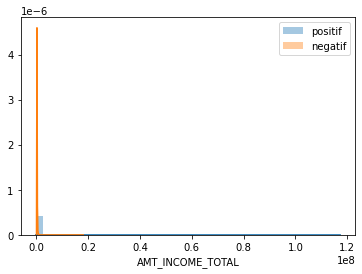

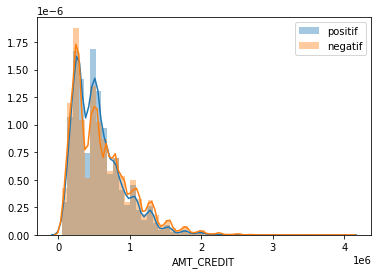

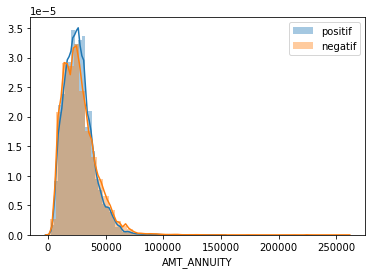

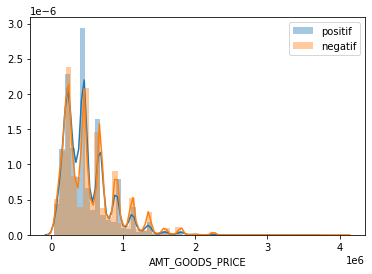

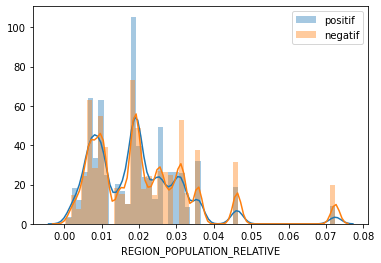

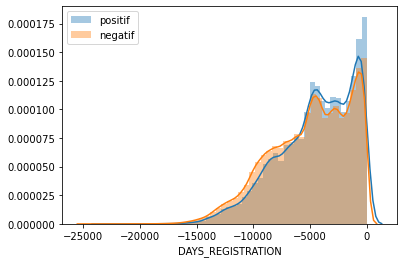

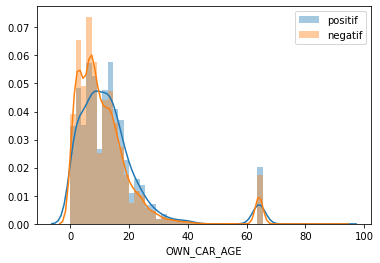

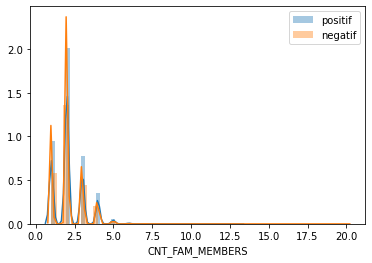

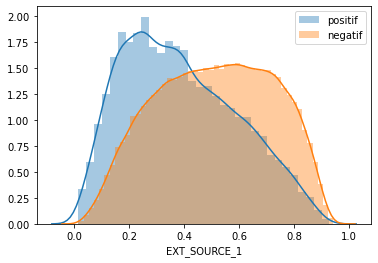

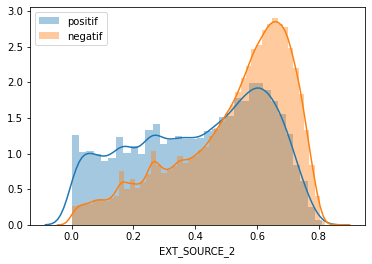

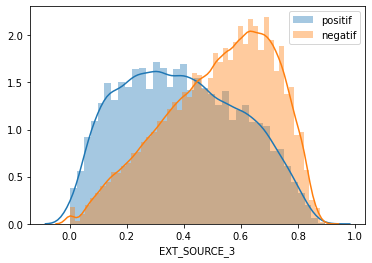

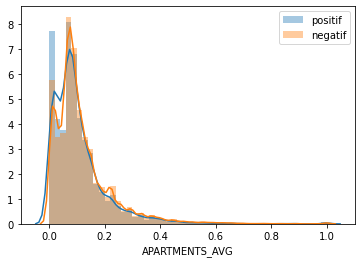

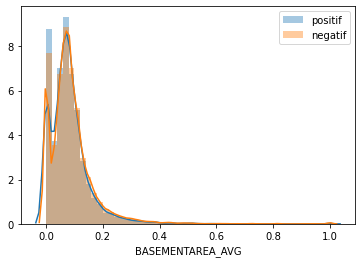

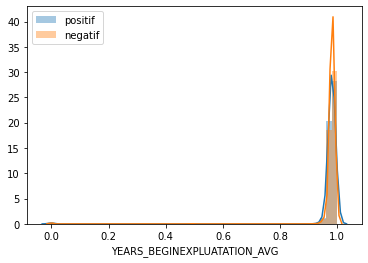

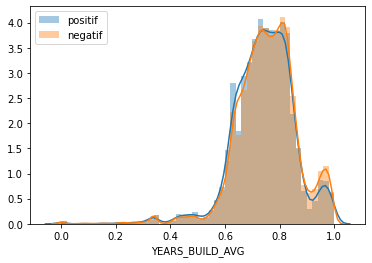

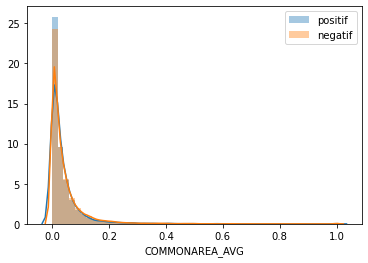

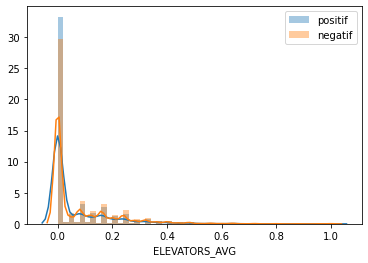

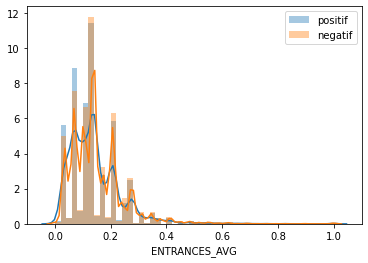

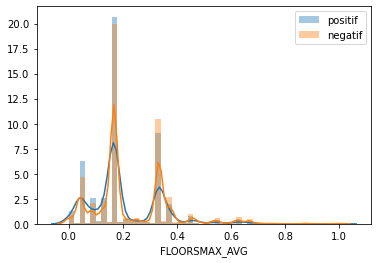

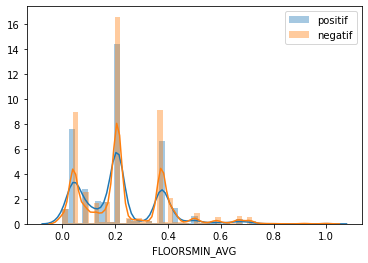

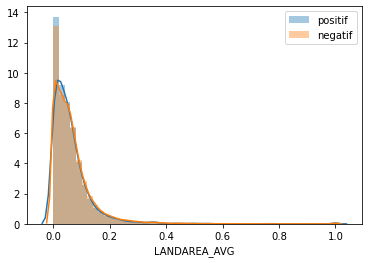

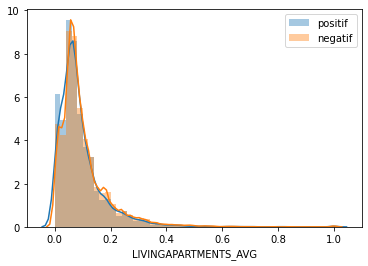

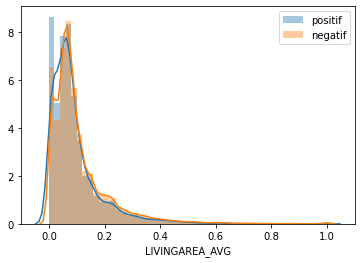

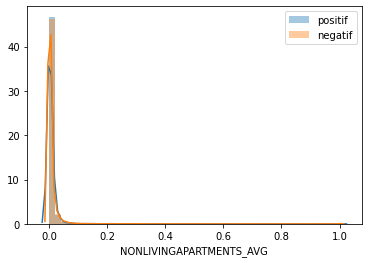

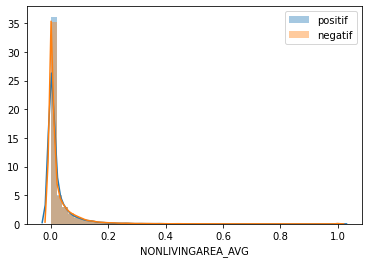

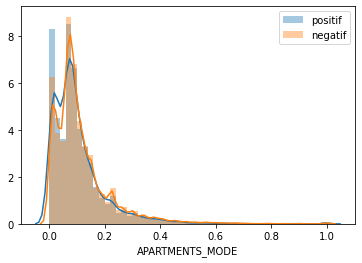

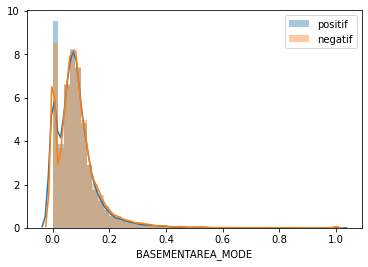

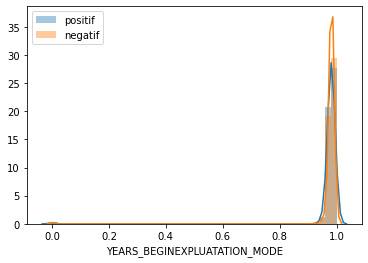

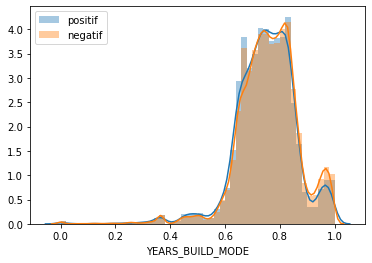

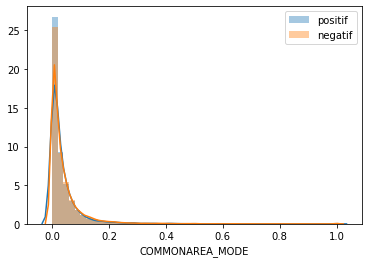

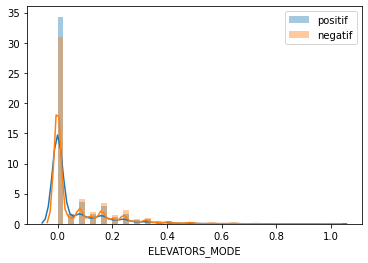

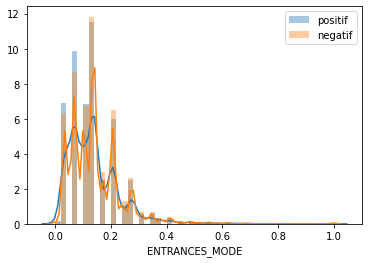

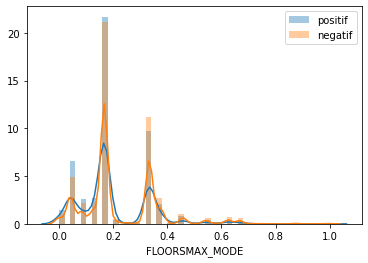

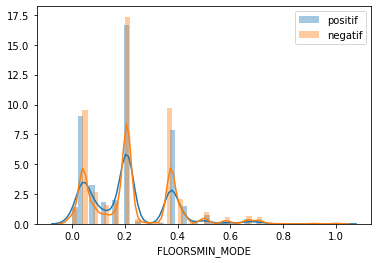

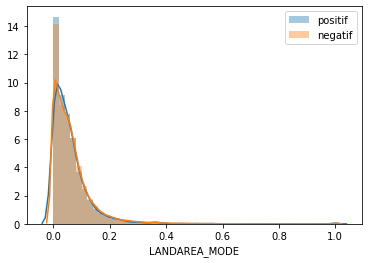

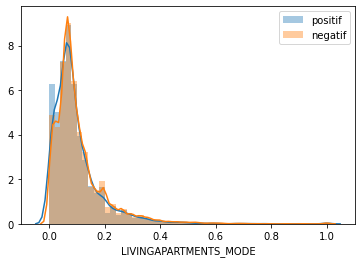

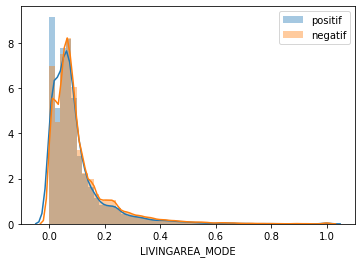

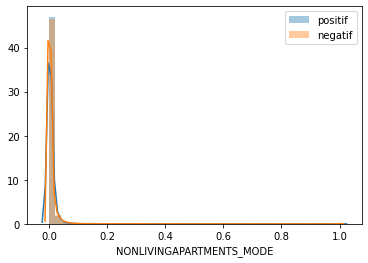

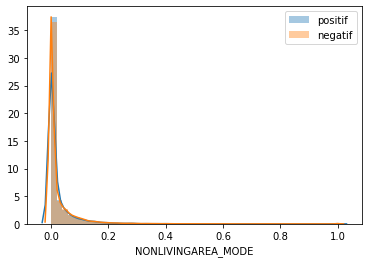

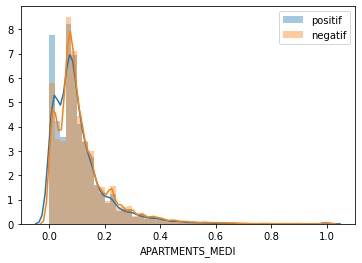

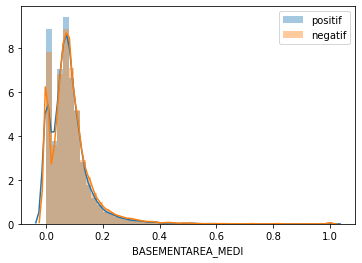

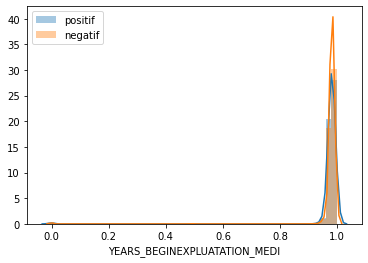

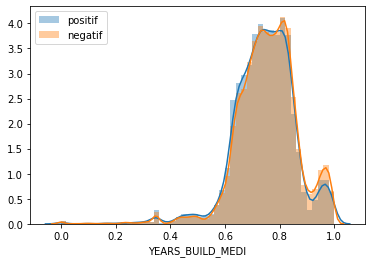

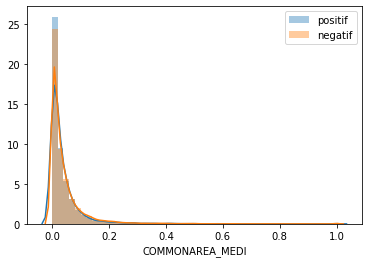

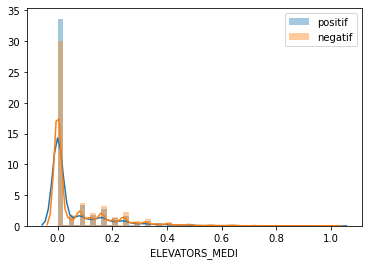

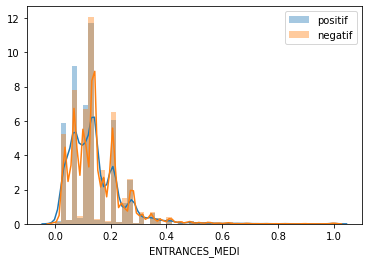

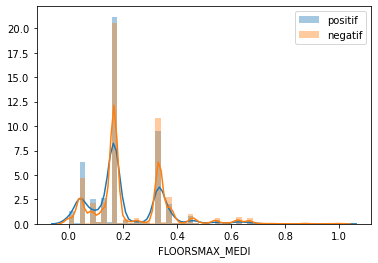

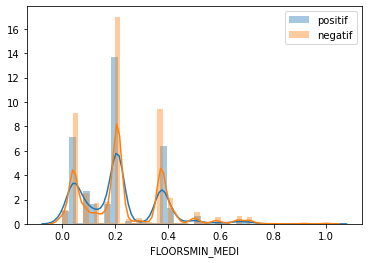

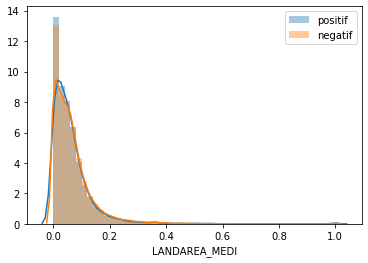

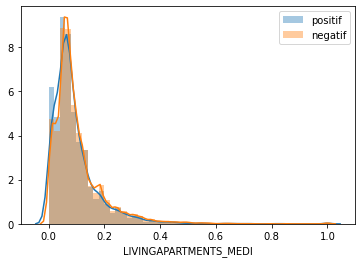

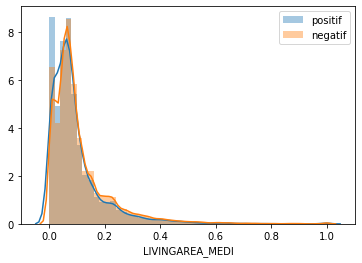

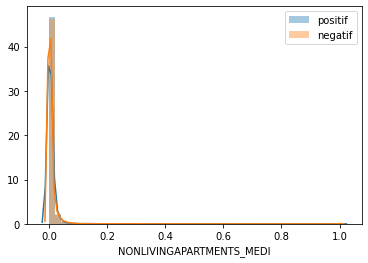

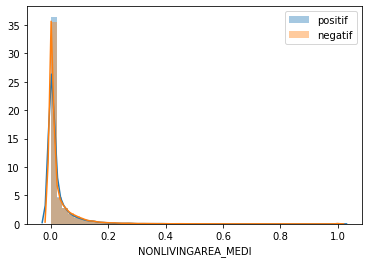

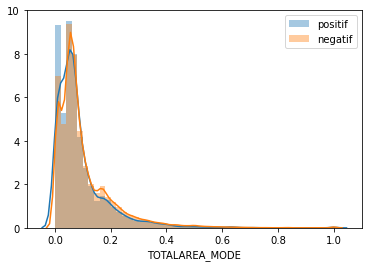

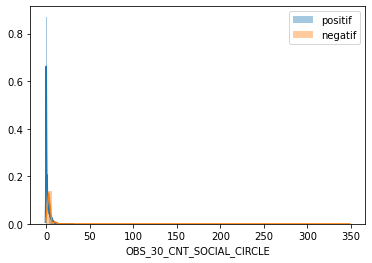

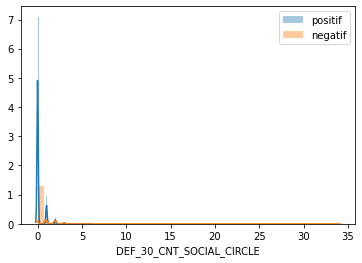

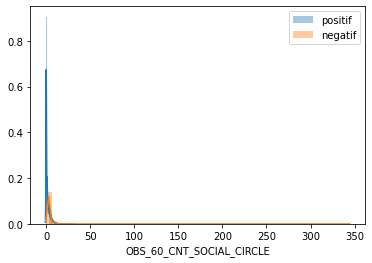

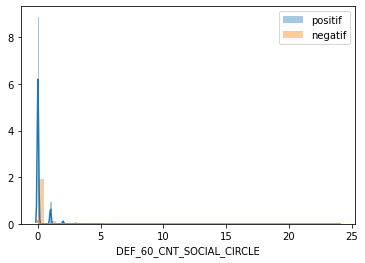

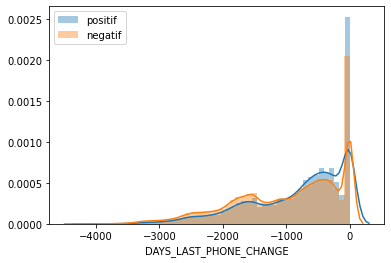

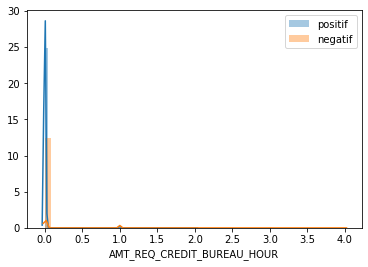

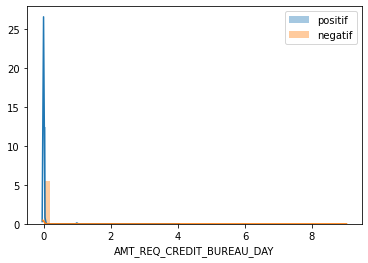

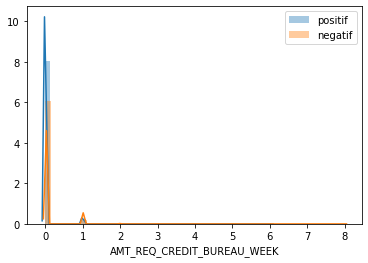

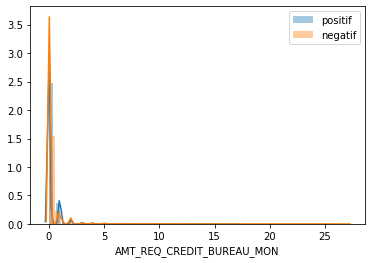

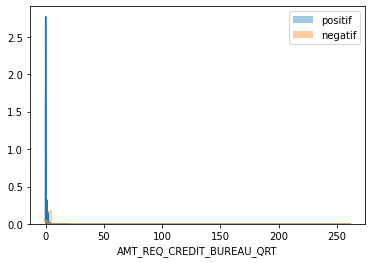

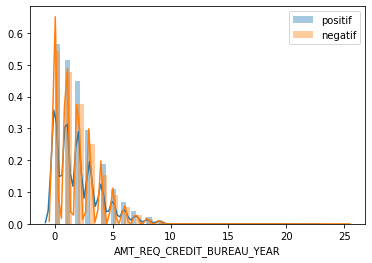

In [27]:
for col in df_float_columns:
    plt.figure()
    sns.distplot(positif[col], label='positif')
    sns.distplot(negatif[col], label='negatif')
    plt.legend()

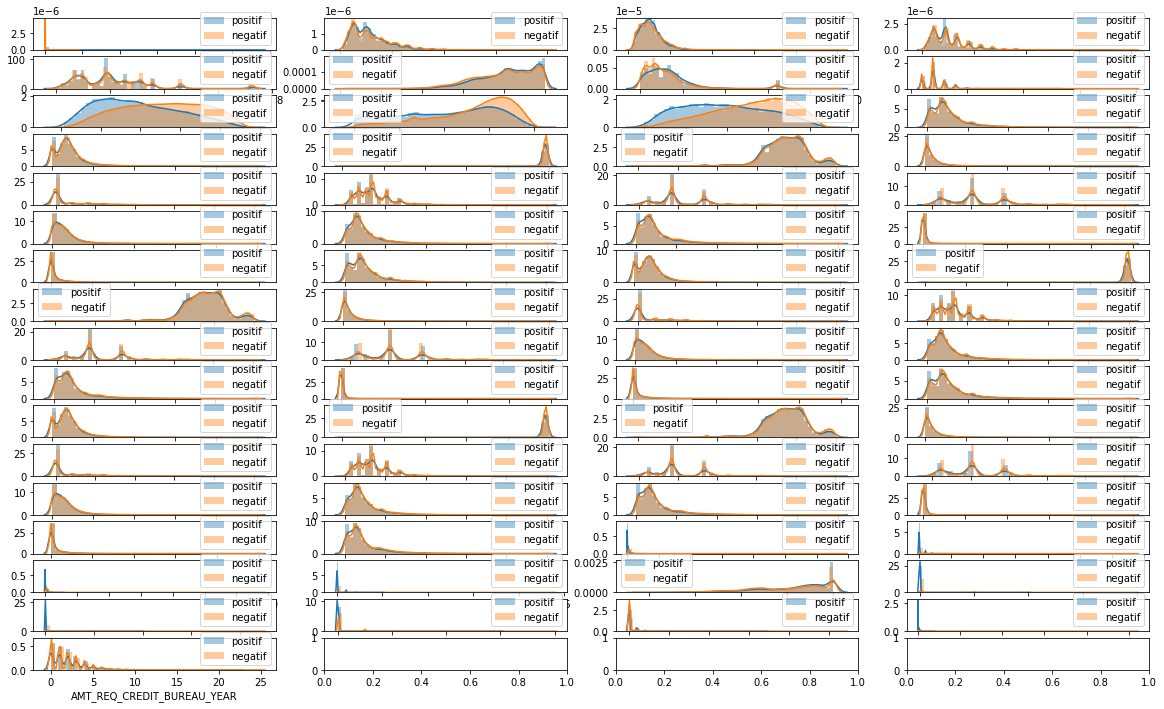

In [65]:
x=0
y=0
fig, axs = plt.subplots(ceil(len(df_float_columns)/4), 4,  figsize=(30, 20))
for col in (df_float_columns):
    if(x>=4):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1


In [28]:
test = df.groupby(['TARGET'])
test

In [30]:
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EMERGENCYSTATE_MODE_1,ORGANIZATION_TYPE_1
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,39
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,11
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2,5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,37
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,2,33
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,1,5
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,0,5
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,2,42
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,57


In [32]:
test['CODE_GENDER'].value_counts()

TARGET  CODE_GENDER
0       F              188278
        M               94404
        XNA                 4
1       F               14170
        M               10655
Name: CODE_GENDER, dtype: int64

In [33]:
test['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185675
        Y                97011
1       N                17249
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64